# Project: Investigated a No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Analyzed No-show appointments Data Set.
### Dependent variable: No-Show changed to ‘Absent’ column name.
### Independent Variables: Age, Gender, Handicap

In [13]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.set_style('darkgrid')
import datetime as dt
import time
from scipy.stats import mode
import ast


<a id='wrangling'></a>
## Data Wrangling

>For data wrangling, I did the following:
1. Changing No-Show column name to ‘Absent’ in order to match values meaning in the column.
2. Fix Patient ID and trim.
3. Fix Handicap column.
4. Delete the Patient ID and Appointment ID columns as they are not required.
5. Separate Schedule day from time
6. Removed time from appointment day
7. Removed ~, ", ‰, ‡, ', ^ from ‘Neighborhood’ column

### General Properties

In [14]:
# Loading data and inspecting data


df=pd.read_csv(r'c:\Udacity\appointments.csv')
df.head(20)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [15]:
# this returns a tuple of the dimensions of the dataframe

df.shape

(110527, 14)

In [16]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
# this returns useful descriptive statistics for each column of data

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
# this returns the datatypes of the columns

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [19]:
# although the datatype for Gender appears to be object, further
# investigation shows it's a string
#type(df['Gender'][0])

type(df['ScheduledDay'][0])

str

In [20]:
# this returns the number of unique values in each column

df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [21]:
# View the index number and label for each column

for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [22]:
# Check for duplicated records

df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [23]:
# Check for Null

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning 

In [24]:
# rename No-show column to No_show column
# rename Handcap column to Handicap column

df.rename(columns={'No-show': 'Absent'}, inplace=True)
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)

# confirm changes
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [25]:
#Finding patientid data type

df['PatientId'].dtype

dtype('float64')

In [4]:
#Changing the Datatype of patientid column
df['PatientId'] = df['PatientId'].astype('str')

#Check for changes
df['PatientId'].head(25)

0      29872500000000.0
1     558998000000000.0
2       4262960000000.0
3        867951000000.0
4       8841190000000.0
5      95985100000000.0
6     733688000000000.0
7       3449830000000.0
8      56394700000000.0
9      78124600000000.0
10    734536000000000.0
11      7542950000000.0
12    566655000000000.0
13    911395000000000.0
14     99884700000000.0
15        99948393975.0
16     84574400000000.0
17     14795000000000.0
18     17135400000000.0
19      7223290000000.0
20    622257000000000.0
21     12154800000000.0
22    863230000000000.0
23    213754000000000.0
24      8734860000000.0
Name: PatientId, dtype: object

In [26]:
#Selecting first 11 characters of patientid so that it looks clean:

df['PatientId'] = df['PatientId'].apply(str).str[:11]
df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,29872500000,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,55899800000,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,42629600000,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,86795100000,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,88411900000,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985100000,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,73368800000,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,34498300000,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394700000,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124600000,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [27]:
#Dropping the column patientid becuase it is not uselful for analysis along with Appointmentid. 
#It is neither dependent nor independent variables

df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
#Cleaning Neighbourhood column

df['Neighbourhood'].apply(lambda x: x.strip('$'))
df['Neighbourhood'].apply(lambda x: x.strip('‡'))
df['Neighbourhood'].apply(lambda x: x.strip('^'))
df['Neighbourhood'].apply(lambda x: x.strip('~'))
df['Neighbourhood'].apply(lambda x: x.strip('+'))


# Checking changes
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [29]:
# convert the Schedule and Appointment column to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [30]:
# extract month and day of week from Start Time to create new columns

df['hour'] = df['ScheduledDay'].dt.hour
df['month'] = df['ScheduledDay'].dt.month
df['day_of_week'] = df['ScheduledDay'].dt.weekday_name

df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent,hour,month,day_of_week
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,4,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,4,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,4,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,4,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,4,Friday
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,8,4,Wednesday
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15,4,Wednesday
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15,4,Wednesday
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,8,4,Friday
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,12,4,Wednesday


<a id='eda'></a>
## Exploratory Data Analysis

> Analyzing the data by plotting after cleaning it.

### General Informative Graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226530A5FD0>,
      dtype=object)

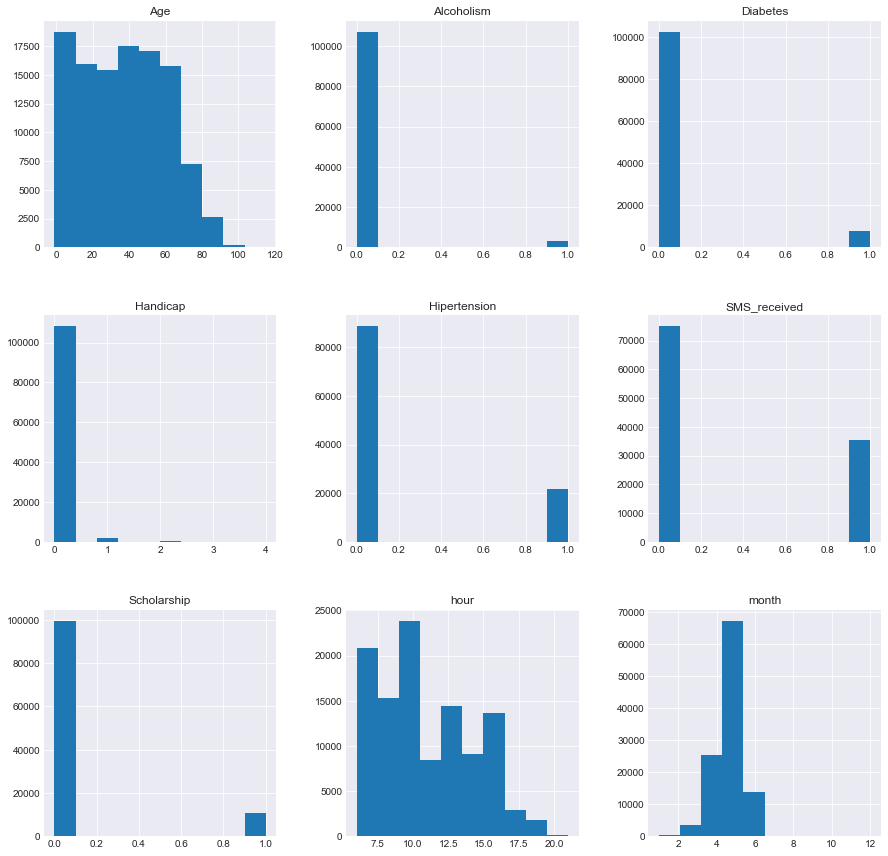

In [31]:
# Creating histograms

df.hist(figsize=(15,15))

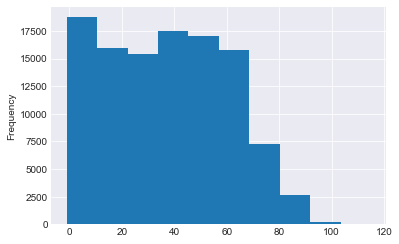

In [32]:
# Plotting Age column as histogram

df['Age'].plot(kind='hist');

# Reseach Question 1: Is Age a reason for not showing up for appointment?

Text(0,0.5,'Age')

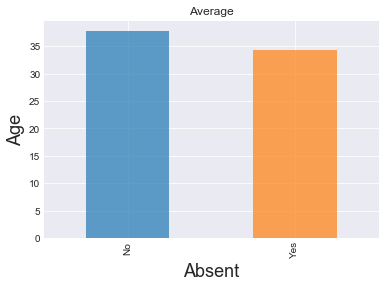

In [33]:
# Finding the affect of age on Absentism.


df.groupby('Absent')['Age'].mean().plot(kind='Bar', title='Average', alpha=.7)
plt.xlabel('Absent', fontsize=18)
plt.ylabel('Age', fontsize=18)


In [34]:
# Counting those who are shownup and also those who are absent.

df.Absent.value_counts()

No     88208
Yes    22319
Name: Absent, dtype: int64

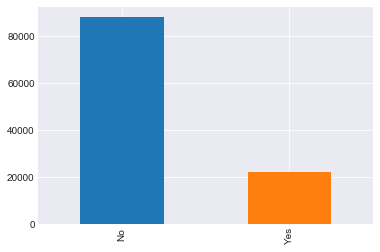

In [35]:
#Plotting for Absent column values

df.Absent.value_counts().plot(kind='bar')

In [36]:
# Assigning values to variable

shownup=df.Absent=='No'
NeverShown=df.Absent=='Yes'

In [37]:
# Calculating shownup mean

df.Age[shownup].mean()

37.790064393252315

In [38]:
# Calculating Never shownup mean 

df.Age[NeverShown].mean()

34.31766656212196

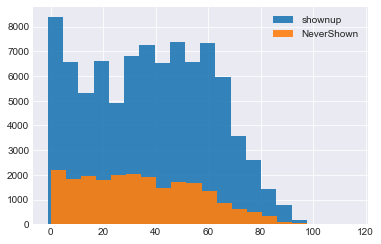

In [39]:
# Comparing shownup and Never shownup mean values


df.Age[shownup].hist(alpha=0.9, bins=20, label='shownup')
df.Age[NeverShown].hist(alpha=0.9, bins=20, label='NeverShown')
plt.legend();

> From the above graph we can conclude that, people who show up for appintment are greater in number 
>than those who are never show up. It seems that infants have the higest probabality of coming for appointment. Secondly, the trend 
>after 70 years is towards falling side. 

## Question No:2   Is Handicap a reason for not showing up for appointment?

Text(0,0.5,'Handicap')

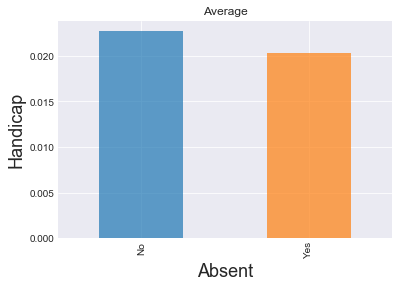

In [40]:
#Is Handicap a reason for not showing up for appointment?


df.groupby('Absent')['Handicap'].mean().plot(kind='Bar', title='Average', alpha=.7)
plt.xlabel('Absent', fontsize=18)
plt.ylabel('Handicap', fontsize=18)


> Handicap people who show up for appointments are greater in number than those who are absent.But the difference is minimal. 
So we can conclude that handicap can be a reason for people not showing up for appointment. Handicap patients rate of showing > up can be improved if some kind of ambulance service or taxi service is provided to patients. Building should be designed specially to cater to needs of all differently abeled patients. 

###  Question 3 : Does Gender have any effect for not showing up for appointment?

In [41]:
# Checking which gender has more absent

df.groupby('Gender')['Absent'].value_counts()

Gender  Absent
F       No        57246
        Yes       14594
M       No        30962
        Yes        7725
Name: Absent, dtype: int64

In [42]:
# Calculating mean values of each gender

df.query('Gender=="F"')['Age'].mean() , df.query('Gender=="M"')['Age'].mean()

(38.89398663697105, 33.73686251195492)

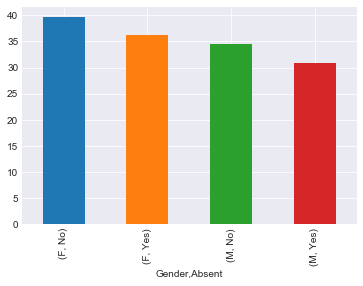

In [44]:
# Plotting graph for Gender and their appointment commitment

df.groupby(['Gender', 'Absent']).Age.mean().plot(kind='bar')

>From the above graph we can conclude that more females show up for appointments then men. However more women are absent as well compared to the men. Possibly women are preoccupied with household responsibilites and child care.Figure can be improved if some sort of baby sitting service is provided at the clinic.

<a id='conclusions'></a>
## Conclusions

# From the above questions and their findings we can conclude that, mostly patients are showing up for their appointments. Handicap could be a reason for not showing up for appointments. Women are towards higher side for not showing up for appointment. Things can be improved for them if some sort of taxi or ambulance service is provided to them, especially baby sitting services at the clinics. 